# 11_C_Comparison_Tree
In diesem Jupyter Notebook werden Bilder von Testtafeln in einer Visualisierung kombiniert.

*Der folgende Code wurde mithilfe von ChatGPT (OpenAI) erstellt und bearbeitet.*

### 1. Zusammenstellung der Aufnahmen

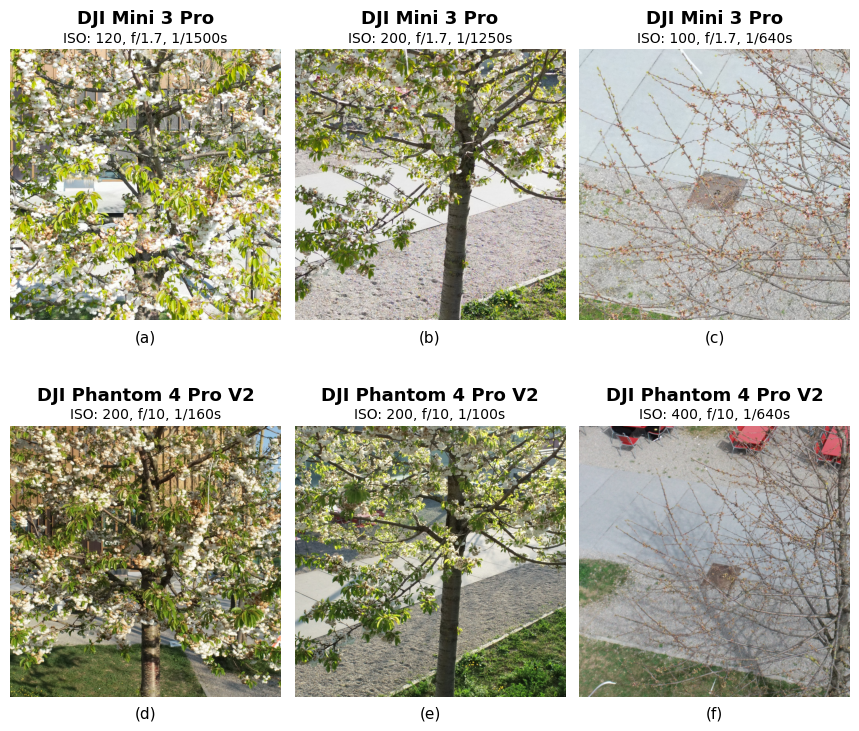

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image
import os

# Manuelle Metadaten (in Reihenfolge der Bilder a–f)
manual_metadata = [
    "ISO: 120, f/1.7, 1/1500s",    # DJI Mini 3 Pro – Bild (a)
    "ISO: 200, f/1.7, 1/1250s",    # DJI Mini 3 Pro – Bild (b)
    "ISO: 100, f/1.7, 1/640s",    # DJI Mini 3 Pro – Bild (c)
    "ISO: 200, f/10, 1/160s",    # DJI Phantom 4 Pro V2 – Bild (d)
    "ISO: 200, f/10, 1/100s",    # DJI Phantom 4 Pro V2 – Bild (e)
    "ISO: 400, f/10, 1/640s"    # DJI Phantom 4 Pro V2 – Bild (f)
]

# Bildpfade
base_dir = "110_D_BaseData"
image_files = [
    "20250411_DJIMini3Pro_1.JPG",
    "20250411_DJIMini3Pro_2.JPG",
    "20250411_DJIMini3Pro_3.JPG",
    "20250411_DJIPhantom4ProV2_1.JPG",
    "20250411_DJIPhantom4ProV2_2.JPG",
    "20250411_DJIPhantom4ProV2_3.JPG"
]
image_paths = [os.path.join(base_dir, f) for f in image_files]
subfig_labels = ['(o)', '(p)', '(q)', '(r)', '(t)', '(u)']

# Zuschnittgröße (optional anpassen)
crop_size = 2000

# 2x3 Plot vorbereiten
fig, axes = plt.subplots(2, 3, figsize=(12, 8), gridspec_kw={'hspace': 0.35, 'wspace': 0.05})

# Schleife durch alle Bilder
for i, (path, label) in enumerate(zip(image_paths, subfig_labels)):
    img = Image.open(path)
    width, height = img.size
    crop_box = (
        width // 2 - crop_size // 2,
        height // 2 - crop_size // 2,
        width // 2 + crop_size // 2,
        height // 2 + crop_size // 2
    )
    cropped = img.crop(crop_box)

    # Kamera erkennen aus Dateiname
    if "Mini3Pro" in path:
        camera = "DJI Mini 3 Pro"
    elif "Phantom4ProV2" in path:
        camera = "DJI Phantom 4 Pro V2"
    else:
        camera = "Unbekannt"

    # Position im Raster
    row = i // 3
    col = i % 3
    ax = axes[row, col]
    ax.imshow(cropped)
    ax.axis("off")

    # Beschriftungen
    ax.text(0.5, 1.08, camera, fontsize=13, fontweight='bold',
            ha='center', va='bottom', transform=ax.transAxes)
    ax.text(0.5, 1.015, manual_metadata[i], fontsize=10,
            ha='center', va='bottom', transform=ax.transAxes)
    ax.text(0.5, -0.035, label, fontsize=11,
            ha='center', va='top', transform=ax.transAxes)

# Gesamtlayout anpassen
plt.subplots_adjust(top=0.90, bottom=0.08, left=0.05, right=0.75)
plt.show()
